In [ ]:
!ls data

# Chapter 6 Linear Model Selection and Regularization 线性模型选择和正则化
Linear models still can do astonishingly well compared to non-linear models. This chapter will explore other types of fitting besides least squares because they can give better prediction accuracy and interpretability.

与非线性模型相比，线性模型仍然可以做得非常好。本章将探讨除最小二乘法之外的其他类型的拟合，因为它们可以提供更好的预测准确性和可解释性

## Classes of alternatives to least squares 最小二乘法的替代方案类别
* Subset Selection - Choose a subset of the predictors
* Shrinkage (regularization) - Fit all predictors but limit their size. Coefficients can go to 0.
* Dimension Reduction - project the predictors into a smaller subspace
* 子集选择 - 选择预测变量的子集
* 收缩（正则化）- 拟合所有预测变量，但限制其大小。系数可以达到 0。
* 降维 - 将预测变量投影到更小的子空间中

## Best Subset Selection 最佳子集选择
Fit all possible models $2^p$ and take the best model using cross-validated
prediction error, Cp, AIC, BIC, or adjusted $R^2$. This can be impossible with large enough p

拟合所有可能的模型 $2^p$，并使用交叉验证的预测误差、Cp、AIC、BIC 或调整后的 $R^2$ 选取最佳模型。如果 p 足够大，这是不可能的

## Stepwise Selection - Forward, Backward and both 逐步选择 - 向前、向后和两者
Because of computational limitation a simpler method of adding or subtracting the best predictor to the current model is employed.

由于计算限制，采用了一种更简单的方法，即在当前模型中添加或减去最佳预测变量。

### Forward Selection 向前选择
Start with an empty model and choose on predictor to add to the model based on best adjusted $R^2$ or other similar metric. Continue adding variables until no improvement in adjusted $R^2$.

A variation to this is to retain each model at each step and use $R^2$ (not adjusted) as the metric. This will build p models. Then use cross validation with $R^2$ to pick the best model of those p models built from forward selection.

从一个空模型开始，并根据最佳调整后的 $R^2$ 或其他类似指标选择一个预测变量添加到模型中。继续添加变量，直到调整后的 $R^2$ 不再改善。

对此的一种变体是在每个步骤中保留每个模型并使用 $R^2$（未调整）作为指标。这将构建 p 个模型。然后使用 $R^2$ 进行交叉验证，从前向选择构建的 p 个模型中挑选出最佳模型。

### Backward Selection 向后选择
Similar to forward selection but start with all predictors in model and remove one at a time until adjusted $R^2$ is maximized or alternatively, find p models with $R^2$ and then use cross validation to pick best of the p models.

类似于前向选择，但从模型中的所有预测因子开始，然后每次移除一个，直到调整后的 $R^2$ 最大化，或者找到具有 $R^2$ 的 p 个模型，然后使用交叉验证从 p 个模型中挑选出最好的。

## Both 两者结合
At each step, consider both adding or subtracting a variable in the model.

在每个步骤中，考虑向模型中添加或删除变量

#### Example: Best subset 最佳子集
Here we apply the best subset selection approach to the Hitters data. We
wish to predict a baseball player’s Salary on the basis of various statistics
associated with performance in the previous year.

在这里，我们将最佳子集选择方法应用于击球手数据。我们希望根据与前一年的表现相关的各种统计数据来预测棒球运动员的薪水。

$y = \beta_0$ find the $R_{adj}=0.2$.


$y = \beta_0 + \beta_1 x_1$ $R_{adj}=0.2$

$y = \beta_0 + \beta_1 x_2$ $R_{adj}=0.4$

$y = \beta_0 + \beta_1 x_2 + \beta_2 x_1$ $R_{adj}=0.4$

$y = \beta_0 + \beta_1 x_2 + \beta_2 x_3$ $R_{adj}=0.6$

$\vdots$

$y = \beta_0 + \beta_1 x_2 + \beta_2 x_3 + \beta_3 x_5$ $R_{adj}=0.8$

### backward
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_5 x_5$ $R_{adj}=0.8$

$y = \beta_0 +  \beta_2 x_2 + \cdots + \beta_5 x_5$ $R_{adj}=0.85$




## F/B selection
$y = \beta_0 $ $R_{adj}=0.2$

$\vdots$

$y = \beta_0 + \beta_1 x_2 + \beta_2 x_3 + \beta_3 x_5$ $R_{adj}=0.8$

$\vdots$

$y = \beta_0 + \beta_1 x_2 + \beta_3 x_5$ $R_{adj}=0.85$

In [ ]:
2**10

1024

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
hitters_df = pd.read_csv('data/hitters.csv')
hitters_df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,#NAME?,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,#NAME?,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,#NAME?,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,#NAME?,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,#NAME?,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


First of all, we note that the `Salary` variable is missing for some of the
players. The `isnull()` function can be used to identify the missing observations. It returns a vector of the same length as the input vector, with a `TRUE` value
for any elements that are missing, and a `FALSE` value for non-missing elements.
The `sum()` function can then be used to count all of the missing elements:

首先，我们注意到某些玩家缺少 Salary 变量。 isnull() 函数可用于识别缺失的观测值。它返回一个与输入向量长度相同的向量，对于任何缺失的元素为 TRUE 值，对于非缺失元素为 FALSE 值。然后可以使用 sum() 函数来计算所有缺失元素的数量：

In [ ]:
print("Number of null values:", hitters_df["Salary"].isnull().sum())

Number of null values: 59


In [ ]:
# Print the dimensions of the original Hitters data (322 rows x 20 columns)
# 打印原始 Hitters 数据的尺寸（322 行 x 20 列）
print("Dimensions of original data:", hitters_df.shape)

# Drop any rows the contain missing values, along with the player names
# 删除包含缺失值的任何行以及玩家姓名
hitters_df_clean = hitters_df.dropna().drop('Unnamed: 0', axis=1)

# Print the dimensions of the modified Hitters data (263 rows x 20 columns)
# 打印修改后的 Hitters 数据的尺寸（263 行 x 20 列）
print("Dimensions of modified data:", hitters_df_clean.shape)

# One last check: should return 0
# 最后检查一下：应该返回 0
print("Number of null values:", hitters_df_clean["Salary"].isnull().sum())

Dimensions of original data: (322, 21)
Dimensions of modified data: (263, 20)
Number of null values: 0


In [ ]:
dummies = pd.get_dummies(hitters_df_clean[['League', 'Division', 'NewLeague']])

y = hitters_df_clean.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
# 删除包含独立变量（工资）的列，以及我们为其创建虚拟变量的列
X_ = hitters_df_clean.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Define the feature set X. 定义特征集X。
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

We can perform best subset selection by identifying the best model that contains a given number of predictors, where **best** is quantified using RSS. We'll define a helper function to outputs the best set of variables for
each model size:

我们可以通过识别包含给定数量的预测变量的最佳模型来执行最佳子集选择，其中最佳模型使用 RSS 进行量化。我们将定义一个辅助函数来输出每个模型大小的最佳变量集

In [ ]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS 在feature_set上拟合模型并计算RSS
    model = sm.OLS(y,X[list(feature_set)].astype(float))
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
def getBest(k):

    tic = time.time()

    results = []

    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))

    # Wrap everything up in a nice dataframe 将所有内容包装在一个漂亮的数据框中
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS 选择 RSS 最高的模型
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    # 返回最佳模型以及有关模型的一些其他有用信息
    return best_model

**This** returns a `DataFrame` containing the best model that we generated, along with some extra information about the model. Now we want to call that function for each number of predictors $k$:

**这**返回一个包含我们生成的最佳模型的 `DataFrame`，以及有关该模型的一些额外信息。现在我们要为每个预测变量 $k$ 调用该函数：

In [ ]:
# Could take quite awhile to complete...
# 可能需要相当长一段时间才能完成...

models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,8):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 19 models on 1 predictors in 0.05387520790100098 seconds.
Processed 171 models on 2 predictors in 0.42514920234680176 seconds.
Processed 969 models on 3 predictors in 2.8069186210632324 seconds.
Processed 3876 models on 4 predictors in 12.580287456512451 seconds.
Processed 11628 models on 5 predictors in 37.50878691673279 seconds.
Processed 27132 models on 6 predictors in 89.87113761901855 seconds.
Processed 50388 models on 7 predictors in 178.8342261314392 seconds.
Total elapsed time: 323.0512845516205 seconds.


Now we have one big DataFrame that contains the best models we've generated along with their RSS:

现在我们有一个大的 DataFrame，其中包含我们生成的最佳模型及其 RSS：

In [ ]:
models_best

,RSS,model
1,43213925.909868,<statsmodels.regression.linear_model.Regressio...
2,30733054.433644,<statsmodels.regression.linear_model.Regressio...
3,29410713.176731,<statsmodels.regression.linear_model.Regressio...
4,27976782.522603,<statsmodels.regression.linear_model.Regressio...
5,27187795.009508,<statsmodels.regression.linear_model.Regressio...
6,26397720.512772,<statsmodels.regression.linear_model.Regressio...
7,26064130.610341,<statsmodels.regression.linear_model.Regressio...


If we want to access the details of each model, no problem! We can get a full rundown of a single model using the `summary()` function:

如果我们想访问每个模型的详细信息，没问题！我们可以使用“summary()”函数获取单个模型的完整概述：

In [ ]:
print(models_best.loc[7, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.792
Method:                 Least Squares   F-statistic:                              144.2
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                    4.76e-85
Time:                        03:37:09   Log-Likelihood:                         -1885.9
No. Observations:                 263   AIC:                                      3786.
Df Residuals:                     256   BIC:                                      3811.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This output indicates that the best two-variable model contains only Hits and CRBI. To save time, we only generated results up to the best 7-variable model. You can use the functions we defined above to explore as many variables as are desired.

此输出表明最佳二变量模型仅包含 Hits 和 CRBI。为了节省时间，我们仅生成最佳 7 变量模型的结果。您可以使用我们上面定义的函数来探索所需数量的变量。

In [ ]:
# Show the best 19-variable model (there's actually only one)
# 显示最佳的 19 变量模型（实际上只有一个）
print(getBest(17)["model"].summary())

Processed 171 models on 17 predictors in 0.6465685367584229 seconds.
                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              61.54
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                    2.25e-78
Time:                        03:38:56   Log-Likelihood:                         -1878.0
No. Observations:                 263   AIC:                                      3790.
Df Residuals:                     246   BIC:                                      3851.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>

Rather than letting the results of our call to the `summary()` function print to the screen, we can access just the parts we need using the model's attributes. For example, if we want the $R^2$ value:

我们可以使用模型的属性仅访问我们需要的部分，而不是将summary() 函数的调用结果打印到屏幕上。例如，如果我们想要 R2 值：

In [ ]:
models_best.loc[2, "model"].rsquared

0.7614950002332872

In addition to the verbose output we get when we print the summary to the screen, fitting the `OLM` also produced many other useful statistics such as adjusted $R^2$, AIC, and BIC. We can examine these to try to select the best overall model. Let's start by looking at $R^2$ across all our models:

除了将摘要打印到屏幕上时获得的详细输出之外，拟合 OLM 还生成许多其他有用的统计数据，例如调整后的 R2 、AIC 和 BIC。我们可以检查这些以尝试选择最佳的整体模型。让我们首先看看我们所有模型的 R2：

In [ ]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)

1    0.664637
2    0.761495
3    0.771757
4    0.782885
5    0.789008
6    0.795140
7    0.797728
dtype: float64

As expected, the $R^2$ statistic increases monotonically as more
variables are included.

Plotting RSS, adjusted $R^2$, AIC, and BIC for all of the models at once will
help us decide which model to select. Note the `type="l"` option tells `R` to
connect the plotted points with lines:

正如预期的那样，随着包含更多变量，R2 统计量单调增加。

同时绘制所有模型的 RSS、调整后的 R2、AIC 和 BIC 将帮助我们决定选择哪个模型。注意 type="l" 选项告诉 R 用线连接绘制的点：

Text(0, 0.5, 'BIC')

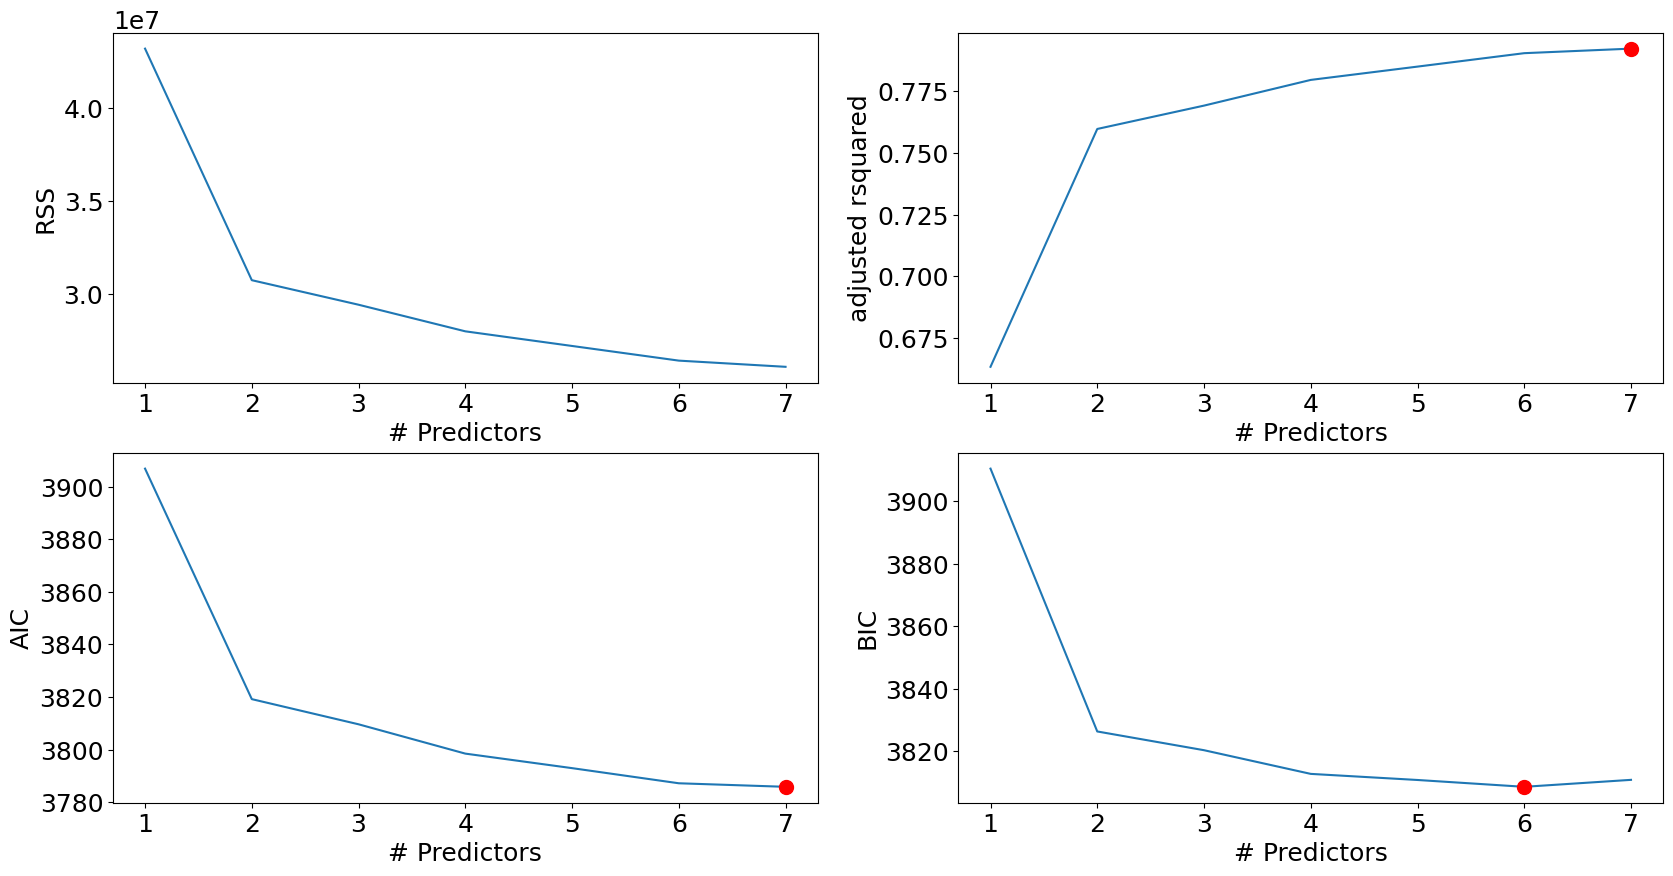

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once 设置一个 2x2 网格，以便我们可以同时查看 4 个图
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# 我们现在将绘制一个红点来指示具有最大调整后 R^2 统计量的模型。
# The argmax() function can be used to identify the location of the maximum point of a vector
# argmax() 函数可用于识别向量最大点的位置
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# 我们现在将绘制一个红点来指示具有最大调整后 R^2 统计量的模型。
# The argmax() function can be used to identify the location of the maximum point of a vector
# argmax() 函数可用于识别向量最大点的位置

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax()+1, rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
# 我们将对 AIC 和 BIC 执行相同的操作，这次寻找具有最小统计量的模型
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin()+1, aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin()+1, bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [ ]:
rsquared_adj.argmax()

6

In [ ]:
rsquared_adj.max()

0.7921974900757028

Recall that in the second step of our selection process, we narrowed the field down to just one model on any $k<=p$ predictors. We see that according to BIC, the best performer is the model with 6 variables. According to AIC and adjusted $R^2$ something a bit more complex might be better. Again, no one measure is going to give us an entirely accurate picture... but they all agree that a model with 5 or fewer predictors is insufficient.

回想一下，在选择过程的第二步中，我们将范围缩小到任何 k<=p 预测变量上的一个模型。我们看到，根据 BIC，表现最好的是具有 6 个变量的模型。根据 AIC 和调整后的 R2 的说法，更复杂一些的东西可能会更好。再次强调，没有任何一种衡量标准能够为我们提供完全准确的图像……但他们都一致认为，具有 5 个或更少预测变量的模型是不够的。

#### Example: Forward Selection

In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process 找出我们仍需处理的预测因子
    remaining_predictors = [p for p in X.columns if p not in predictors]

    tic = time.time()

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))

    # Wrap everything up in a nice dataframe 将所有内容包装在一个漂亮的数据框中
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS 选择 RSS 最高的模型
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    # 返回最佳模型以及有关模型的一些其他有用信息
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  19 models on 1 predictors in 0.07537484169006348 seconds.
Processed  18 models on 2 predictors in 0.0680246353149414 seconds.
Processed  17 models on 3 predictors in 0.06677651405334473 seconds.
Processed  16 models on 4 predictors in 0.07611393928527832 seconds.
Processed  15 models on 5 predictors in 0.0698709487915039 seconds.
Processed  14 models on 6 predictors in 0.04367327690124512 seconds.
Processed  13 models on 7 predictors in 0.04105520248413086 seconds.
Processed  12 models on 8 predictors in 0.042231082916259766 seconds.
Processed  11 models on 9 predictors in 0.0392756462097168 seconds.
Processed  10 models on 10 predictors in 0.03606557846069336 seconds.
Processed  9 models on 11 predictors in 0.03382420539855957 seconds.
Processed  8 models on 12 predictors in 0.032858848571777344 seconds.
Processed  7 models on 13 predictors in 0.0264284610748291 seconds.
Processed  6 models on 14 predictors in 0.027669906616210938 seconds.
Processed  5 models on 15 predicto

In [ ]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.665
Model:                            OLS   Adj. R-squared (uncentered):              0.663
Method:                 Least Squares   F-statistic:                              519.2
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                    4.20e-64
Time:                        03:42:13   Log-Likelihood:                         -1952.4
No. Observations:                 263   AIC:                                      3907.
Df Residuals:                     262   BIC:                                      3910.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We see that using forward stepwise selection, the best one-variable
model contains only `Hits`, and the best two-variable model additionally
includes `CRBI`. Let's see how the models stack up against best subset selection:

我们看到，使用前向逐步选择，最佳单变量模型仅包含“命中”，而最佳双变量模型另外包括“CRBI”。让我们看看这些模型与最佳子集选择的比较结果：

In [ ]:
print(models_best.loc[6, "model"].summary())
print(models_fwd.loc[6, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              166.3
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                    1.79e-85
Time:                        03:44:23   Log-Likelihood:                         -1887.6
No. Observations:                 263   AIC:                                      3787.
Df Residuals:                     257   BIC:                                      3809.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Example: Backward Selection

In [ ]:
def backward(predictors):

    tic = time.time()

    results = []

    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))

    # Wrap everything up in a nice dataframe 将所有内容包装在一个漂亮的数据框中
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS 选择 RSS 最高的模型
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    # 返回最佳模型以及有关模型的一些其他有用信息
    return best_model

In [ ]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time", (toc-tic), "seconds.")

Processed  19 models on 18 predictors in 0.07421207427978516 seconds.
Processed  18 models on 17 predictors in 0.0683603286743164 seconds.
Processed  17 models on 16 predictors in 0.07436299324035645 seconds.
Processed  16 models on 15 predictors in 0.06305432319641113 seconds.
Processed  15 models on 14 predictors in 0.05935049057006836 seconds.
Processed  14 models on 13 predictors in 0.05679917335510254 seconds.
Processed  13 models on 12 predictors in 0.045427560806274414 seconds.
Processed  12 models on 11 predictors in 0.045969247817993164 seconds.
Processed  11 models on 10 predictors in 0.04284238815307617 seconds.
Processed  10 models on 9 predictors in 0.03571176528930664 seconds.
Processed  9 models on 8 predictors in 0.03696584701538086 seconds.
Processed  8 models on 7 predictors in 0.025892019271850586 seconds.
Processed  7 models on 6 predictors in 0.022932052612304688 seconds.
Processed  6 models on 5 predictors in 0.01979851722717285 seconds.
Processed  5 models on 4 p

In [ ]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[7, "model"].params)

------------
Best Subset:
------------
Hits            1.680029
Walks           3.399961
CAtBat         -0.328835
CHits           1.347017
CHmRun          1.349373
PutOuts         0.248166
Division_W   -111.943760
dtype: float64


In [ ]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[7, "model"].params)

-----------------
Foward Selection:
-----------------
Hits            7.277149
CRBI            0.652415
Division_W   -110.656338
PutOuts         0.259787
AtBat          -1.644651
Walks           3.684324
League_N       49.978410
dtype: float64


In [ ]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[7, "model"].params)

-------------------
Backward Selection:
-------------------
AtBat         -1.601655
Hits           6.148449
Walks          5.866033
CRuns          1.097453
CWalks        -0.650614
PutOuts        0.310125
Division_W   -95.027171
dtype: float64


# Choosing Optimal Model 选择最佳模型
## Adjusting Training Statistics or Using Cross Validation 调整训练统计数据或使用交叉验证
As learned in Chapter 5, cross validation is an extremely good tool at giving us insight to how well the model will be used on unseen data (test data).

But alternatively to cross validation, we can punish the training error statistics so in theory they can give us insight on what the test error will be. There have been several statistics developed to give us insight as to what the model will do for unseen errors.

The 4 most popular are AIC, BIC, Mallows Cp and Adjusted R^2. AIC, BIC and Cp all have similar formulas that inflate the error for more predictors and a higher estimated variance. Adjusted R squared lowers the R^2 by each additional predictor in the model. All 4 of these statistics are 'classical' model selectors and were commonly used.

Cross validation can be computationally intense but with modern computation we can build lots of models and evaluate them easily.

正如第 5 章所述，交叉验证是一个非常好的工具，可以让我们深入了解模型在未见过的数据（测试数据）上的使用情况。

但除了交叉验证之外，我们还可以惩罚训练误差统计数据，这样理论上它们可以让我们了解测试误差是什么。已经开发了一些统计数据，让我们深入了解该模型将如何处理看不见的错误。

最流行的 4 个是 AIC、BIC、Mallows Cp 和调整后的 R^2。 AIC、BIC 和 Cp 都有类似的公式，这些公式会夸大更多预测变量和更高估计方差的误差。调整后的 R 平方会降低模型中每个附加预测变量的 R^2。所有这 4 个统计数据都是“经典”模型选择器并且被广泛使用。

交叉验证的计算量可能很大，但通过现代计算，我们可以构建大量模型并轻松评估它们。

#### Example: Model selection using the Validation Set Approach
使用验证集方法进行模型选择

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('data/hitters.csv')

# Drop any rows the contain missing values, along with the player names
# 删除包含缺失值的任何行以及玩家姓名
df = df.dropna().drop('Unnamed: 0', axis=1)

# Get dummy variables 获取虚拟变量
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Extract independent variable 提取独立变量
y = pd.DataFrame(df.Salary)

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
# 删除包含独立变量（工资）的列，以及我们为其创建虚拟变量的列
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Define the feature set X. 定义特征集X。
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [ ]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


+ In order for the validation set approach to yield accurate estimates of the test error, we must use only the training observations to perform all aspects of model-fitting — including variable selection.
+ Therefore, the determination of which model of a given size is best must be made using only the training observations.
+ This point is subtle but important. If the full data set is used to perform the best subset selection step, the validation set errors and cross-validation errors that we obtain will not be accurate estimates of the test error.

+ In order to use the validation set approach, we begin by splitting the observations into a training set and a test set.
+ We do this by creating a random vector, train, of elements equal to TRUE if the corresponding observation is in the training set, and FALSE otherwise.
+ The vector test is TRUE if the observation is in the test set, and a FALSE otherwise.
+ Note the np.invert() in the command to create test causes TRUEs to be switched to FALSEs and vice versa.
+ We also set a random seed so that the user will obtain the same training set/test set split.

+ 为了使验证集方法能够准确估计测试误差，我们必须仅使用训练观测值来执行模型拟合的所有方面 - 包括变量选择。
+ 因此，必须仅使用训练观测值来确定给定大小的哪个模型是最佳的。
+ 这一点很微妙但很重要。如果使用完整数据集来执行最佳子集选择步骤，则我们获得的验证集误差和交叉验证误差将不是测试误差的准确估计。

+ 为了使用验证集方法，我们首先将观测值分成训练集和测试集。
+ 我们通过创建一个随机向量 train 来实现这一点，如果相应的观测值在训练集中，则元素等于 TRUE，否则为 FALSE。
+ 如果观测值在测试集中，则向量测试为 TRUE，否则为 FALSE。
+ 请注意，创建测试的命令中的 np.invert() 会导致 TRUE 切换为 FALSE，反之亦然。
+ 我们还设置了一个随机种子，以便用户获得相同的训练集/测试集分割。

In [ ]:
np.random.seed(seed=12)
train = np.random.choice([True, False], size = len(y), replace = True)
test = np.invert(train)

In [ ]:
test.shape

(263,)

+ We'll define our helper function to outputs the best set of variables for each model size like we did previously.
+ Note that we'll need to modify this to take in both test and training sets, because we want the returned error to be the test error:

+ 我们将定义辅助函数来输出每个模型大小的最佳变量集，就像我们之前所做的那样。
+ 请注意，我们需要修改它以同时包含测试集和训练集，因为我们希望返回的错误是测试错误：

In [ ]:
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RSS 在feature_set上拟合模型并计算RSS
    model = sm.OLS(y_train,X_train[list(feature_set)].astype(float))
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    return {"model":regr, "RSS":RSS}

And our function to perform forward selection:

In [ ]:
def forward(predictors, X_train, y_train, X_test, y_test):

    results = []

    # Pull out predictors we still need to process 找出我们仍需处理的预测因子
    remaining_predictors = [p for p in X_train.columns if p not in predictors]

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))

    # Wrap everything up in a nice dataframe 将所有内容包装在一个漂亮的数据框中
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS 选择 RSS 最高的模型
    best_model = models.loc[models['RSS'].argmin()]

    # Return the best model, along with some other useful information about the model
    # 返回最佳模型以及有关模型的一些其他有用信息
    return best_model

Now, we'll call our `forward()` function on the training set in order to perform forward selection for all model sizes:

现在，我们将在训练集上调用“forward（）”函数，以便对所有模型大小执行前向选择：

In [ ]:
models_train = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,len(X.columns)+1):
    models_train.loc[i] = forward(predictors, X[train], y[train]["Salary"], X[test], y[test]["Salary"])
    predictors = models_train.loc[i]["model"].model.exog_names

Now let's plot the errors, and find the model that minimizes it:

现在让我们绘制错误图，并找到最小化错误的模型：

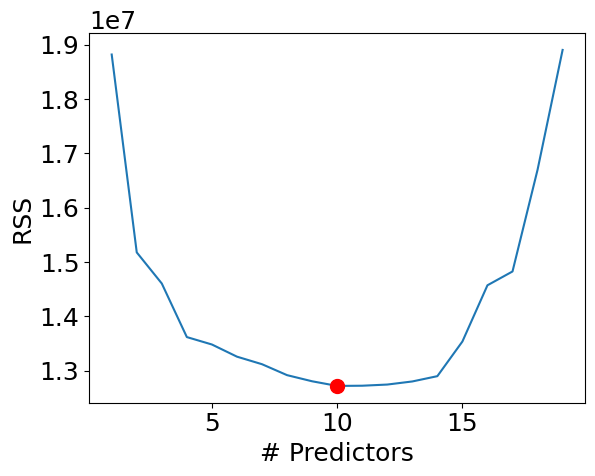

In [ ]:
plt.plot(models_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(pd.to_numeric(models_train["RSS"]).argmin()+1, models_train["RSS"].min(), "or")

+ We find that the best model (according to the validation set approach) is the one that contains 10 predictors.

+ Now that we know what we're looking for, let's perform best subset selection on the full dataset and select the best 10-predictor model.
+ It is important that we make use of the *full data set* in order to obtain more accurate coefficient estimates.
+ We perform this selection on the *full data set* and select the best 10-predictor model, rather than simply using the predictors that we obtained from the training set, because the best 10-predictor model on the full data set may differ from the corresponding model on the training set.
+ 我们发现最佳模型（根据验证集方法）是包含 10 个预测因子的模型。

+ 现在我们知道了我们在寻找什么，让我们对完整数据集执行最佳子集选择，并选择最佳的 10 个预测因子模型。
+ 重要的是，我们要利用 *完整数据集* 来获得更准确的系数估计值。
+ 我们对 *完整数据集* 执行此选择，并选择最佳的 10 个预测因子模型，而不是简单地使用从训练集中获得的预测因子，因为完整数据集上的最佳 10 个预测因子模型可能与训练集上的相应模型不同。

In [ ]:
models_test = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,11):
    models_test.loc[i] = forward(predictors, X[test], y[test]["Salary"], X[test], y[test]["Salary"])
    predictors = models_test.loc[i]["model"].model.exog_names

In [ ]:
models_trainonly = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,11):
    models_trainonly.loc[i] = forward(predictors, X[train], y[train]["Salary"], X[train], y[train]["Salary"])
    predictors = models_train.loc[i]["model"].model.exog_names

In fact, we see that the best ten-variable model on the full data set has a different set of predictors than the best ten-variable model on the training set:

事实上，我们看到，完整数据集上的最佳十变量模型与训练集上的最佳十变量模型具有不同的预测因子集：

In [ ]:
print(models_train.loc[10, "model"].model.exog_names)
print(models_test.loc[10, "model"].model.exog_names)
print(models_trainonly.loc[10, "model"].model.exog_names)

['Walks', 'CRBI', 'Hits', 'Division_W', 'CWalks', 'CRuns', 'AtBat', 'League_N', 'CHits', 'Runs']
['Walks', 'CRBI', 'Assists', 'Division_W', 'CWalks', 'CRuns', 'PutOuts', 'Errors', 'League_N', 'CHmRun']
['Walks', 'CRBI', 'Hits', 'Division_W', 'CWalks', 'CRuns', 'AtBat', 'League_N', 'CHits', 'CAtBat']


#### Example: Model selection using Cross-Validation 使用交叉验证进行模型选择
+ Now let's try to choose among the models of different sizes using cross-validation.
+ This approach is somewhat involved, as we must perform forward selection within each of the $k$ training sets.
+ Despite this, we see that with its clever subsetting syntax, `python` makes this job quite easy.
+ First, we create a vector that assigns each observation to one of $k = 10$ folds, and we create a DataFrame in which we will store the results:
+ 现在让我们尝试使用交叉验证在不同大小的模型中进行选择。
+ 这种方法有些复杂，因为我们必须在每个 $k$ 个训练集中执行前向选择。
+ 尽管如此，我们看到，凭借其巧妙的子集语法，`python` 使这项工作变得非常容易。
+ 首先，我们创建一个向量，将每个观察结果分配给 $k = 10$ 个折叠之一，然后创建一个 DataFrame 来存储结果：

In [ ]:
k = 10        # number of folds 折叠次数
np.random.seed(seed=1)
folds = np.random.choice(k, size = len(y), replace = True)

# Create a DataFrame to store the results of our upcoming calculations
# 创建一个 DataFrame 来存储我们即将进行的计算的结果
cv_errors = pd.DataFrame(columns=range(1,k+1), index=range(1,20))
cv_errors = cv_errors.fillna(0)

+ Now let's write a for loop that performs cross-validation.
+ In the $j^{th}$ fold, the elements of folds that equal $j$ are in the test set, and the remainder are in the training set.
+ We make our predictions for each model size, compute the test errors on the appropriate subset, and store them in the appropriate slot in the matrix `cv.errors`.
+ 现在让我们编写一个执行交叉验证的 for 循环。
+ 在第 $j^{th}$ 个折叠中，等于 $j$ 的折叠元素在测试集中，其余元素在训练集中。
+ 我们对每个模型大小进行预测，计算适当子集上的测试误差，并将它们存储在矩阵“cv.errors”中的适当位置。

In [ ]:
models_cv = pd.DataFrame(columns=["RSS", "model"])

# Outer loop iterates over all folds 外循环遍历所有折叠
for j in range(1,k+1):

    # Reset predictors 重置预测器
    predictors = []

    # Inner loop iterates over each size i  内循环迭代每个尺寸 i
    for i in range(1,len(X.columns)+1):

        # The perform forward selection on the full dataset minus the jth fold, test on jth fold
        # 对整个数据集减去第 j 个折叠执行前向选择，对第 j 个折叠进行测试
        models_cv.loc[i] = forward(predictors, X[folds != (j-1)], y[folds != (j-1)]["Salary"], X[folds == (j-1)], y[folds == (j-1)]["Salary"])

        # Save the cross-validated error for this fold 保存此折叠的交叉验证错误
        cv_errors[j][i] = models_cv.loc[i]["RSS"]

        # Extract the predictors 提取预测因子
        predictors = models_cv.loc[i]["model"].model.exog_names


<ipython-input-46-f48e40583eec>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_errors[j][i] = models_cv.loc[i]["RSS"]
<ipython-input-46-f48e40583eec>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_errors[j][i] = models_cv.loc[i]["RSS"]
<ipython-input-46-f48e40583eec>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_errors[j][i] = models_cv.loc[i]["RSS"]
<ipython-input-46-f48e40583eec>:16: SettingWithCopyWarning: 
A valu

In [ ]:
cv_errors

,1,2,3,4,5,6,7,8,9,10
1,3.107901e+06,3.212305e+06,4.840104e+06,2.475454e+06,3.750303e+06,1.551977e+06,1.827367e+06,9.115194e+06,1.370720e+06,2.204863e+06
2,2.354036e+06,2.247881e+06,3.414444e+06,1.642456e+06,3.160951e+06,1.250565e+06,1.567470e+06,8.520751e+06,1.081053e+06,1.856305e+06
3,2.148733e+06,2.012864e+06,3.009436e+06,1.566582e+06,2.775618e+06,9.073041e+05,1.260460e+06,8.456577e+06,9.697846e+05,1.674333e+06
4,1.946031e+06,1.870511e+06,2.630784e+06,1.521526e+06,2.618751e+06,8.051359e+05,1.143883e+06,8.331747e+06,8.575537e+05,1.618265e+06
5,1.850398e+06,1.605149e+06,2.537691e+06,1.502728e+06,2.608466e+06,7.761712e+05,1.124175e+06,8.221957e+06,7.939196e+05,1.574253e+06
6,1.778324e+06,1.574266e+06,2.498621e+06,1.482576e+06,2.632055e+06,7.761634e+05,1.115742e+06,8.196970e+06,7.812360e+05,1.534220e+06
7,1.761112e+06,1.524414e+06,2.452303e+06,1.480345e+06,2.661105e+06,7.797162e+05,1.104388e+06,8.171960e+06,7.764572e+05,1.503831e+06
8,1.733231e+06,1.529626e+06,2.418944e+06,1.477510e+06,2.660654e+06,8.038592e+05,1.100754e+06,7.449396e+06,7.745898e+05,1.536790e+06
9,1.773705e+06,1.607920e+06,2.381843e+06,1.504520e+06,2.677002e+06,8.216293e+05,1.096926e+06,7.136283e+06,7.746164e+05,1.542746e+06
10,1.865910e+06,1.682294e+06,2.378624e+06,1.528102e+06,2.597882e+06,8.549975e+05,1.136163e+06,7.059485e+06,7.759932e+05,1.597315e+06


+ This has filled up the `cv_errors` DataFrame such that the $(i,j)^{th}$ element corresponds to the test MSE for the $i^{th}$ cross-validation fold for the best $j$-variable model.
+ We can then use the `apply()` function to take the `mean` over the columns of this matrix.
+ This will give us a vector for which the $j^{th}$ element is the cross-validation error for the $j$-variable model.

+ 这已填充 `cv_errors` DataFrame，使得 $(i,j)^{th}$ 个元素对应于最佳 $j$ 个变量模型的第 $i^{th}$ 次交叉验证折叠的测试 MSE。
+ 然后我们可以使用 `apply()` 函数对该矩阵的列取 `mean`。
+ 这将为我们提供向量，其中 $j^{th}$ 个元素是 $j$ 个变量模型的交叉验证误差。

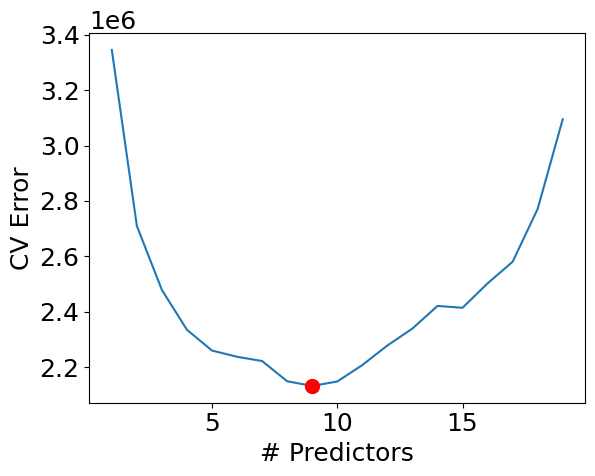

In [ ]:
cv_mean = cv_errors.apply(np.mean, axis=1)

plt.plot(cv_mean)
plt.xlabel('# Predictors')
plt.ylabel('CV Error')
plt.plot(cv_mean.argmin()+1, cv_mean.min(), "or")

We see that cross-validation selects a 9-predictor model. Now let's go back to our results on the full data set in order to obtain the 9-predictor model.

我们看到交叉验证选择了 9 个预测变量模型。现在让我们回到完整数据集上的结果，以获得 9 个预测变量模型。

In [ ]:
print(models_cv.loc[9, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.685
Model:                            OLS   Adj. R-squared (uncentered):              0.672
Method:                 Least Squares   F-statistic:                              54.56
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                    8.32e-52
Time:                        04:00:39   Log-Likelihood:                         -1737.9
No. Observations:                 235   AIC:                                      3494.
Df Residuals:                     226   BIC:                                      3525.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

+ For comparison, let's also take a look at the statistics from last lab:

+ 为了进行比较，我们还来看看上一个实验室的统计数据：

Text(0, 0.5, 'BIC')

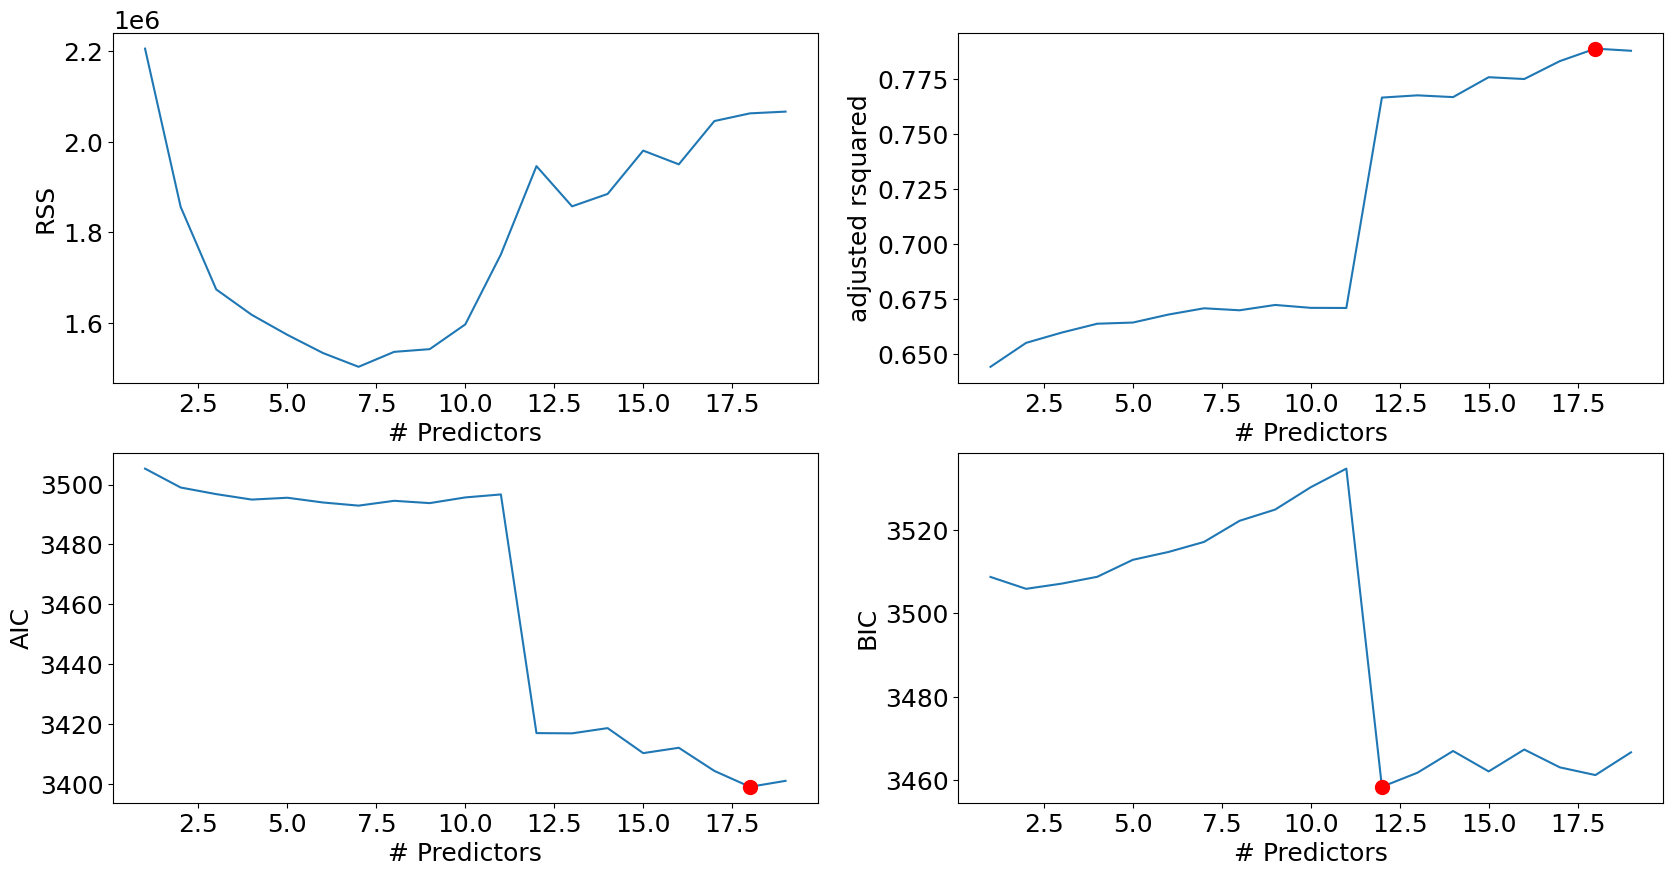

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
# 设置一个 2x2 网格，以便我们可以同时查看 4 个图
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
# 我们现在将绘制一个红点来表示具有最大调整 R^2 统计量的模型。
# argmax() 函数可用于识别向量最大点的位置
plt.plot(models_cv["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
# 我们现在将绘制一个红点来表示具有最大调整 R^2 统计量的模型。
# argmax() 函数可用于识别向量最大点的位置
rsquared_adj = models_cv.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax()+1, rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
# 我们将对 AIC 和 BIC 执行相同的操作，这次寻找具有最小统计量的模型
aic = models_cv.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin()+1, aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_cv.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin()+1, bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

+ Notice how some of the indicators are similar the cross-validated model, and others are very different?

+ 注意到一些指标与交叉验证模型相似，而其他指标则有很大不同吗？

### YOUR TURN
Use any dataset from this link
http://archive.ics.uci.edu/ml/datasets.html?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table

# Shrinkage Methods 收缩方法
+ Fit a model containing all $p$ predictors.
+ The coefficients estimates are constrains or regularizes, which shrink its towards zero.
+ It wil reduce the variance, but does not guarantee it will improve the fit.
+ Ridge and Lasso regression are most common.

+ 拟合包含所有 $p$ 个预测变量的模型。
+ 系数估计是约束或正则化，使其缩小至零。
+ 它会减少方差，但不能保证它会改善拟合度。
+ Ridge 和 Lasso 回归最为常见。

### Ridge Regression 岭回归
+ The least squares fitting procedure estimates $\beta_0, \beta_1, \ldots, \beta_p$ using the values that minimize
$$\textrm{RSS} = \sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2}$$
+ Ridge regression minimizes
$$\sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} + \lambda \sum_{j=1}^p{\beta_j^2} = \textrm{RSS} + \lambda \sum_{j=1}^p{\beta_j^2}$$
where $\lambda \geq 0$ is a tuning parameter.
+ The shrinkage penalty, $\lambda \sum_{j=1}^p{\beta_j^2}$, is small when $\beta_1, \ldots, \beta_p$ are close to zero.
+ The tuning parameter $\lambda$ serves to control the relative impact of these two terms on the regression coefficient estimates.
+ When $\lambda=0$ then ridge equals least squares. When $\lambda \rightarrow \infty$, all predictors head to 0.
+ Ridge regression produce  a different set of coefficient estimates, $\hat{\beta}_\lambda^R$, for each value of $\lambda$.
+ Since ridge regression works directly with the size of the parameter coefficients, you must scale all predictors by dividing by their standard deviation.
$$\tilde{x}_{ij}=\frac{x_{ij}}{\sqrt{\frac{1}{n}\sum_{i=1}^n{\left( x_{ij} - \bar{x}_j \right)^2}}}$$

+ 最小二乘拟合程序使用最小化的值估计 $\beta_0, \beta_1, \ldots, \beta_p$
$$\textrm{RSS} = \sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2}$$
+ 岭回归最小化
$$\sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} + \lambda \sum_{j=1}^p{\beta_j^2} = \textrm{RSS} + \lambda \sum_{j=1}^p{\beta_j^2}$$
其中 $\lambda \geq 0$ 是一个调整参数。
+ 当 $\beta_1, \ldots, \beta_p$ 接近于零时，收缩惩罚 $\lambda \sum_{j=1}^p{\beta_j^2}$ 较小。
+ 调整参数 $\lambda$ 用于控制这两个项对回归系数估计的相对影响。
+ 当 $\lambda=0$ 时，岭回归等于最小二乘。当 $\lambda \rightarrow \infty$ 时，所有预测因子都趋向于 0。
+ 对于每个 $\lambda$ 值，岭回归都会产生一组不同的系数估计值，$\hat{\beta}_\lambda^R$。
+ 由于岭回归直接与参数系数的大小相关，因此您必须通过除以其标准差来缩放所有预测因子。
$$\tilde{x}_{ij}=\frac{x_{ij}}{\sqrt{\frac{1}{n}\sum_{i=1}^n{\left( x_{ij} - \bar{x}_j \right)^2}}}$$


In [ ]:
from IPython.display import Image
Image('images/pw46.png', width =700)

$\ell_2$ norm, $\left\Vert \beta \right\Vert_2 = \sqrt{\sum_{j=1}^p{\beta_j^2}}$

#### Example

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

+ We will use the `sklearn` package in order to perform ridge regression and the lasso.
+ The main functions in this package that we care about are `Ridge()`, which can be used to fit ridge regression models, and `Lasso()` which will fit lasso models.
+ They also have cross-validated counterparts: `RidgeCV()` and `LassoCV()`. We'll use these a bit later.

Before we proceed, let's first ensure that the missing values have
been removed from the data, as described in the previous lab.

+ 我们将使用 `sklearn` 包来执行岭回归和套索。
+ 我们关心的这个包中的主要函数是 `Ridge()`，它可用于拟合岭回归模型，以及 `Lasso()`，它将拟合套索模型。
+ 它们还有交叉验证的对应函数：`RidgeCV()` 和 `LassoCV()`。我们稍后会用到它们。

在继续之前，让我们首先确保缺失值已从数据中删除，如上一个实验中所述。

In [ ]:
df = pd.read_csv('data/hitters.csv').dropna().drop('Unnamed: 0', axis = 1)
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

We will now perform ridge regression and the lasso in order to predict `Salary` on
the `Hitters` data. Let's set up our data:

我们现在将执行岭回归和套索，以便根据“Hitters”数据预测“Salary”。让我们设置我们的数据：

In [ ]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
# 删除包含独立变量（薪水）的列，以及我们为其创建虚拟变量的列
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Define the feature set X. 定义特征集X。
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    bool   
 17  Division_W   263 non-null    bool   
 18  NewLeague_N  263 non-null    bool   
dtypes: bool(3), f

+ The `Ridge()` function has an alpha argument ($\lambda$, but with a different name!) that is used to tune the model.
+ We'll generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:

+ `Ridge()` 函数有一个 alpha 参数 ($\lambda$，但名称不同！)，用于调整模型。
+ 我们将生成一个从非常大到非常小的 alpha 值数组，基本上涵盖了从仅包含截距的空模型到最小二乘拟合的所有场景：

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas


array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

+ Associated with each alpha value is a vector of ridge regression coefficients, which we'll store in a matrix `coefs`.
+ In this case, it is a $19 \times 100$ matrix, with 19 rows (one for each predictor) and 100 columns (one for each value of alpha).
+ Remember that we'll want to standardize the variables so that they are on the same scale. To do this, we can use the `StandardScaler()` function:

+ 与每个 alpha 值相关联的是岭回归系数向量，我们将其存储在矩阵“coefs”中。
+ 在本例中，它是一个 $19 \times 100$ 矩阵，有 19 行（每个预测变量一行）和 100 列（每个 alpha 值一列）。
+ 请记住，我们需要标准化变量，使它们处于同一尺度。为此，我们可以使用 `StandardScaler()` 函数：

In [ ]:
ridge = Ridge()
coefs = []

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)

np.shape(coefs)

(100, 19)

We expect the coefficient estimates to be much smaller, in terms of $l_2$ norm,
when a large value of alpha is used, as compared to when a small value of alpha is
used.

Let's plot and find out:

我们预计，当使用较大的 alpha 值时，与使用较小的 alpha 值相比，系数估计值会小得多（就 $l_2$ 范数而言）。

让我们绘制图表并找出答案：

Text(0, 0.5, 'weights')

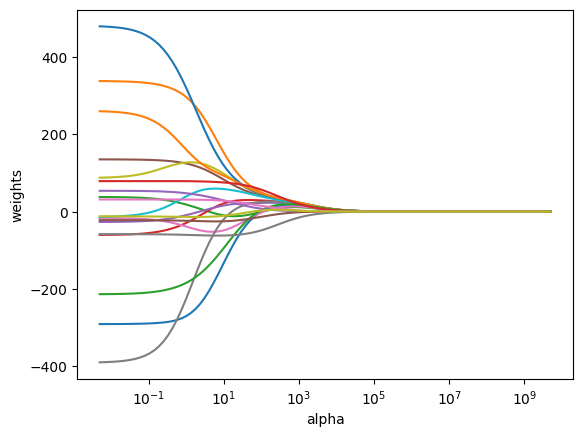

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

We now split the samples into a training set and a test set in order
to estimate the test error of ridge regression

现在我们将样本分成训练集和测试集，以便估计岭回归的测试误差

In [ ]:
# Split data into training and test sets 将数据拆分为训练集和测试集
X_train, X_test , y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=1)

Fit a ridge regression model on the training set, and evaluate its MSE on the test set, using  $\lambda=4$ :

在训练集上拟合岭回归模型，并使用 $\lambda=4$ 评估其在测试集上的 MSE：

In [ ]:
ridge2 = Ridge(alpha = 4)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data 对训练数据进行岭回归拟合
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data 使用此模型预测测试数据
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients 打印系数
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE 计算测试 MSE

AtBat         -213.176543
Hits           191.133532
HmRun          -54.236259
Runs             0.497409
RBI             77.755957
Walks           89.751563
Years          -27.347561
CAtBat        -120.436464
CHits           89.341261
CHmRun          83.888337
CRuns           98.317502
CRBI           116.286711
CWalks         -40.517948
PutOuts        117.412662
Assists         26.509603
Errors         -19.132449
League_N        36.016247
Division_W     -60.417909
NewLeague_N    -18.714889
dtype: float64
102375.7076961398


In [ ]:
## Let alpha=10^10
ridge3 = Ridge(alpha = 10**10)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data 对训练数据进行岭回归拟合
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data 使用此模型预测测试数据
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients 打印系数
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE 计算测试 MSE

AtBat          2.514813e-06
Hits           2.912660e-06
HmRun          1.986276e-06
Runs           2.685289e-06
RBI            3.189361e-06
Walks          3.118248e-06
Years          2.473459e-06
CAtBat         3.257461e-06
CHits          3.480687e-06
CHmRun         3.711503e-06
CRuns          3.474689e-06
CRBI           3.938490e-06
CWalks         3.029160e-06
PutOuts        3.055508e-06
Assists       -4.753637e-08
Errors         1.674891e-07
League_N      -1.638619e-07
Division_W    -1.015342e-06
NewLeague_N   -1.328587e-07
dtype: float64
172862.22014055075


+ This big penalty shrinks the coefficients to a very large degree, essentially reducing to a model containing just the intercept.
+ This over-shrinking makes the model more biased, resulting in a higher MSE.
+ now check whether there is any benefit to performing ridge regression with alpha = 4 instead of just performing least squares regression.
+ Recall that least squares is simply ridge regression with alpha = 0.

+ 这个大惩罚会将系数缩小到非常大的程度，本质上会缩小到仅包含截距的模型。
+ 这种过度缩小使模型更加有偏差，导致更高的 MSE。
+ 现在检查执行 alpha = 4 的岭回归是否有任何好处，而不仅仅是执行最小二乘回归。
+ 回想一下，最小二乘只是 alpha = 0 的岭回归。

In [ ]:
### The least squares, alpha = 0
ridge2 = Ridge(alpha = 0)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

AtBat          -267.752871
Hits            191.830073
HmRun           -41.721641
Runs             -0.988044
RBI             102.935440
Walks            75.220967
Years            45.444252
CAtBat        -1381.044044
CHits          1407.138021
CHmRun          244.425704
CRuns            88.048881
CRBI           -193.153012
CWalks           45.168467
PutOuts         117.645848
Assists          67.244233
Errors          -39.726067
League_N         66.762729
Division_W      -56.861659
NewLeague_N     -40.856844
dtype: float64
116690.46856663836


+ It looks like we are indeed improving over regular least-squares!

+ Instead of arbitrarily choosing alpha $ = 4$, it would be better to use cross-validation to choose the tuning parameter alpha.
+ We can do this using the cross-validated ridge regression function, `RidgeCV()`.
+ By default, the function performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the argument `cv`.

+ 看起来我们确实比常规最小二乘法有所改进！

+ 与其任意选择 alpha $ = 4$，不如使用交叉验证来选择调整参数 alpha。
+ 我们可以使用交叉验证岭回归函数 `RidgeCV()` 来做到这一点。
+ 默认情况下，该函数执行广义交叉验证（LOOCV 的有效形式），但可以使用参数 `cv` 进行更改。

In [ ]:
###  use cross-validation to choose the tuning parameter alpha. 使用交叉验证来选择调整参数alpha。
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

87.37642000038414

Therefore, we see that the value of alpha that results in the smallest cross-validation
error is 87.37.

What is the test MSE associated with this value of
alpha?

因此，我们看到导致最小交叉验证误差的 alpha 值为 87.37。

与此 alpha 值相关的测试 MSE 是多少？

In [ ]:
###Fit to the test data 适合测试数据
ridge4 = Ridge(alpha = ridgecv.alpha_)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

100041.0014465957

This represents a further improvement over the test MSE that we got using
alpha $ = 4$.

Finally, we refit our ridge regression model on the full data set,
using the value of alpha chosen by cross-validation, and examine the coefficient
estimates.

这比我们使用
alpha $ = 4$ 获得的测试 MSE 有了进一步的改进。

最后，我们使用通过交叉验证选择的 alpha 值，在完整数据集上重新拟合我们的岭回归模型，并检查系数估计值。

In [ ]:
###Fit to the whole data 适合整个数据
ridge4.fit(X_scaled, y)

print(pd.Series(ridge4.coef_, index = X.columns))

AtBat          -3.523031
Hits           52.317273
HmRun          -2.229998
Runs           29.166801
RBI            22.313457
Walks          42.608761
Years          -5.214714
CAtBat         24.399636
CHits          46.574450
CHmRun         40.154375
CRuns          47.179284
CRBI           49.378118
CWalks          0.430680
PutOuts        58.565659
Assists         8.184012
Errors        -14.476788
League_N       15.731040
Division_W    -50.182047
NewLeague_N     2.213752
dtype: float64


### The Lasso 套索
+ Least absolute shrinkage and selection operator
+ Ridge regression will include all $p$ predictors in the final model since it will only shrink the coefficients towards zero, not exactly zero. Therefore, if $p$ is large, then the model is hard to be interpreted.
+ Lasso can overcome this problem.
$$\sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} + \lambda \sum_{j=1}^p{\left|\beta_j\right|} = \textrm{RSS} + \lambda \sum_{j=1}^p{\left|\beta_j\right|}$$

+ Lasso uses $\ell_1$ penalty instead of $\ell_2$ (absolute value of predictors vs squared value).
+ $\ell_1$ norm, $\left\Vert \beta \right\Vert_1 = \sum{\left| \beta_j \right|}$.
+ The lasso performs variable selection by setting some predictors to exactly 0 (and thus automatic variable selection), unlike ridge which will never completely do eliminate variables.
+ The lasso yields sparse models — models that involve only a subset of the variables.


+ 最小绝对收缩和选择运算符
+ 岭回归将在最终模型中包含所有 $p$ 个预测变量，因为它只会将系数收缩至零，而不是完全为零。因此，如果 $p$ 很大，则模型很难解释。
+ Lasso 可以克服这个问题。
$$\sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} + \lambda \sum_{j=1}^p{\left|\beta_j\right|} = \textrm{RSS} + \lambda \sum_{j=1}^p{\left|\beta_j\right|}$$

+ Lasso 使用 $\ell_1$ 惩罚而不是 $\ell_2$（预测变量的绝对值与平方值）。
+ $\ell_1$ 范数，$\left\Vert \beta \right\Vert_1 = \sum{\left| \beta_j \right|}$。
+ 套索通过将一些预测变量设置为精确 0（从而自动进行变量选择）来执行变量选择，而不像岭回归那样永远不会完全消除变量。
+ 套索产生稀疏模型 - 仅涉及变量子集的模型。


In [ ]:
from IPython.display import Image
Image('images/pw47.png', width =700)

#### Example:
+ we saw that ridge regression with a wise choice of alpha can outperform least squares as well as the null model on the Hitters data set.
+ We now ask whether the lasso can yield either a more accurate or a more interpretable model than ridge regression.
+ In order to fit a lasso model, we'll use the `Lasso()` function; however, this time we'll need to include the argument `max_iter = 10000`.
+ Other than that change, we proceed just as we did in fitting a ridge model:


+ 我们看到，明智选择 alpha 的岭回归在 Hitters 数据集上的表现可以优于最小二乘法和零模型。
+ 我们现在要问的是，套索是否可以产生比岭回归更准确或更易于解释的模型。
+ 为了拟合套索模型，我们将使用 `Lasso()` 函数；但是，这次我们需要包含参数 `max_iter = 10000`。
+ 除了这一变化之外，我们继续按照拟合岭模型的方式进行：

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

Text(0, 0.5, 'weights')

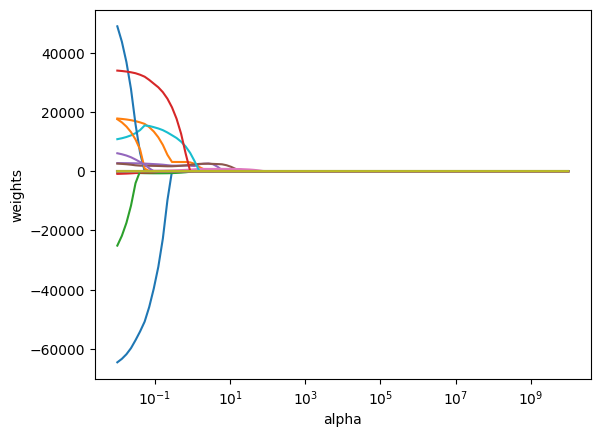

In [ ]:

lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scaler.transform(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

+ Notice that in the coefficient plot that depending on the choice of tuning parameter, some of the coefficients are exactly equal to zero.
+ We now perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

+ 请注意，在系数图中，根据调整参数的选择，一些系数恰好等于零。
+ 我们现在执行 10 倍交叉验证来选择最佳 alpha，重新拟合模型，并计算相关的测试误差：

In [ ]:
## Perform 10-fold cross-validation to choose the best alpha. 执行 10 倍交叉验证以选择最佳 alpha。

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

105121.06327904538

In [ ]:
lassocv.alpha_

28.038544563299862

In [ ]:
mean_squared_error(y_train, lasso.predict(X_train))

4910846584.237021

This is substantially lower than the test set MSE of the null model and of least squares, and only a little worse than the test MSE of ridge regression with alpha chosen by cross-validation.

However, lasso has a substantial advantage over ridge regression in
that the resulting coefficient estimates are sparse. Here we see that 13 of
the 19 coefficient estimates are exactly zero:

这比空模型和最小二乘的测试集 MSE 低得多，仅比通过交叉验证选择 alpha 的岭回归的测试 MSE 差一点。

然而，套索比岭回归有一个显著的优势，因为得到的系数估计是稀疏的。在这里我们看到 19 个系数估计中有 13 个恰好为零：

In [ ]:
# Some of the coefficients are now reduced to exactly zero. 一些系数现在已减少到恰好为零。
pd.Series(lasso.coef_, index=X.columns)

AtBat            0.000000
Hits            47.417582
HmRun            0.000000
Runs             0.000000
RBI              0.000000
Walks           64.015661
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun          16.243847
CRuns            0.000000
CRBI           168.983385
CWalks           0.000000
PutOuts        104.196395
Assists         -0.000000
Errors          -0.000000
League_N         0.000000
Division_W     -43.965512
NewLeague_N      0.000000
dtype: float64

### Alternative logic of lasso and ridge regression 套索和岭回归的替代逻辑
+ Instead of thinking of penalizing the error by either the $\ell_1$ or $\ell_2$ norm, we can think of setting up lasso/ridge regression as minimizing the squared errors subject to keeping the parameters less than a certain value.
+ Think of this value as a 'budget', $s$, of allowable spending to occur. You can allow yourself to spend your parameters in any way you chose as long as you don't go over the total budget.
+ For Lasso
$$\displaystyle \min_{\beta}\left\{ \sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} \right\} \quad \textrm{subject to} \quad \sum_{j=1}^p{\left|\beta_j\right|} \leq s$$
and for ridge regression
$$\displaystyle \min_{\beta}\left\{ \sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} \right\} \quad \textrm{subject to} \quad \sum_{j=1}^p{\beta^2_j} \leq s$$

+ Lasso yields predictors equivalent to 0 because of sharp corners



我们可以将套索/岭回归设置为最小化平方误差，同时保持参数小于某个值，而不是考虑用 $\ell_1$ 或 $\ell_2$ 范数来惩罚误差。
+ 将此值视为允许支出的“预算”$s$。只要不超过总预算，您就可以以任何方式花费参数。
+ 对于 Lasso
$$\displaystyle \min_{\beta}\left\{ \sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} \right\} \quad \textrm{subject to} \quad \sum_{j=1}^p{\left|\beta_j\right|} \leq s$$
对于岭回归
$$\displaystyle \min_{\beta}\left\{ \sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} \right\} \quad \textrm{subject to} \quad \sum_{j=1}^p{\beta^2_j} \leq s$$

+ Lasso 因尖角而产生等同于 0 的预测因子

![ridge and lasso](images/ridge.png)

### Which is better Lasso or Ridge Lasso 和 Ridge 哪个更好
+ In general, when there are many important predictor variables that related to the response, ridge will perform better.
+ When there are only a few variables that relate to the response, lasso will do better.
+ However, cross validation can be used to determine this.

+ 一般而言，当有许多重要的预测变量与响应相关时，ridge 会表现更好。
+ 当只有少数变量与响应相关时，lasso 会表现更好。
+ 但是，可以使用交叉验证来确定这一点。

### Choosing $\lambda$
Choose $\lambda$ through cross validation. Search an array of $\lambda$'s through cross validation and choose the $\lambda$ which minimizes MSE. Then build your model with that $\lambda$ on all the data.

通过交叉验证选择 $\lambda$。通过交叉验证搜索 $\lambda$ 数组并选择最小化 MSE 的 $\lambda$。然后使用该 $\lambda$ 在所有数据上构建模型。

# Your turn!

1. Now it's time to test out these approaches (ridge regression and the lasso) and evaluation methods (validation set, cross validation) on other datasets.
2. You may want to work with a team on this portion of the lab.
3. You may use any of the datasets from the UCI machine learning repository (http://archive.ics.uci.edu/ml/datasets.html).
4. Download a dataset, and try to determine the optimal set of parameters to use to model it! You are free to use the same dataset you have used previously.


1. 现在是时候在其他数据集上测试这些方法（岭回归和套索）和评估方法（验证集、交叉验证）。
2. 您可能希望与团队合作完成实验室的这一部分。
3. 您可以使用 UCI 机器学习存储库中的任何数据集（http://archive.ics.uci.edu/ml/datasets.html）。
4. 下载数据集，并尝试确定用于建模的最佳参数集！您可以自由使用以前使用过的相同数据集。